# ML models with and without scikit learn.

## Logistic regression

What is logistic regression?

Binary classification model which predicts the probability of the input that, it belongs to one of the 2 classes. 

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statistics

In [24]:
train = pd.read_csv("/kaggle/input/titanic-yeah/train.csv")
test = pd.read_csv("/kaggle/input/titanic-yeah/test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
train.isnull().sum()
#Cabin gets out and lets see what to do about age

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
train = train.drop('Cabin', axis=1)
test = test.drop('Cabin', axis=1)
print(f"Train columns: {train.columns.tolist()}")
print(f"Test columns: {test.columns.tolist()}")
#Survived is to be predicted

Train columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']
Test columns: ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


In [27]:
datasets = [train, test]
for dataset in datasets:
# Compute mean and standard deviation of age
    mean_age = dataset['Age'].mean()
    std_age = dataset['Age'].std()
    
    # Generate random ages in the range [mean - std, mean + std]
    random_ages = np.random.uniform(mean_age - std_age, mean_age + std_age, dataset['Age'].isnull().sum())
    
    # Fill missing values with these random ages
    dataset.loc[dataset['Age'].isnull(), 'Age'] = random_ages

In [28]:
print(train.info())
#1 nan remains in test, best to drop. But, they want 418 rows in submission 
#test.dropna(axis = 0, how = 'any', inplace = True)
test = test.fillna(test.Fare.mean())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Nam

In [22]:
lst = test["Fare"].to_list()
statistics.mode(lst)

7.75

In [29]:
train.describe() #Here, there are 2 categorical values that we need. Embarked and sex
train['Sex'] = train['Sex'].replace(['female', 'male'],[0, 1])
test['Sex'] = test['Sex'].replace(['female', 'male'],[0, 1])
train = pd.get_dummies(train, columns=['Embarked'], dtype=int)
test = pd.get_dummies(test, columns=['Embarked'], dtype=int)

<ipython-input-29-6bb77151fd5c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Sex'] = train['Sex'].replace(['female', 'male'],[0, 1])
<ipython-input-29-6bb77151fd5c>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Sex'] = test['Sex'].replace(['female', 'male'],[0, 1])


In [45]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [30]:
train[["Embarked_Q","Embarked_S","Embarked_C"]]

,Embarked_Q,Embarked_S,Embarked_C
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
886,0,1,0
887,0,1,0
888,0,1,0
889,0,0,1


In [31]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.622192,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783
std,257.353842,0.486592,0.836071,0.477990,13.495438,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,28.500000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,37.295766,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [32]:
correlation = train.drop(columns=['PassengerId', 'Name', "Ticket"]).corr()['Survived'].sort_values(ascending=False)

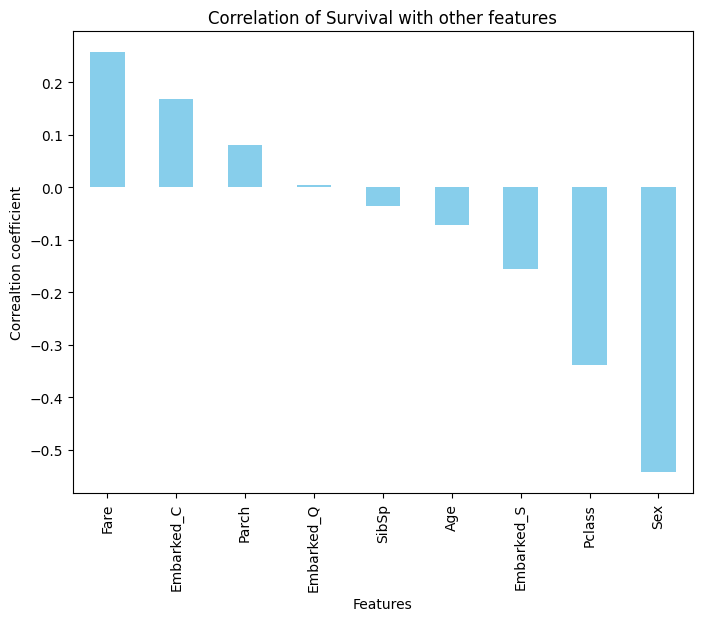

In [33]:
correlation.drop("Survived").plot(kind="bar",figsize=(8,6), color="skyblue")
plt.title("Correlation of Survival with other features")
plt.xlabel("Features")
plt.ylabel("Correaltion coefficient")
plt.show()

### With SK learn

In [34]:
"""Completely my fault, no need for correlation here because correlation 
wouldn't even matter with categorical variables""" 
x_train = train.drop(["Survived","PassengerId", "Name", "Ticket"],axis=1)
y_train = train["Survived"]
x_test = test.drop(["PassengerId", "Name", "Ticket"],axis=1)
y_train.shape, x_train.shape , x_test.shape

((891,), (891, 9), (418, 9))

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc = round(model.score(x_train,y_train)*100,2)
print(acc)

80.13


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
data = pd.DataFrame({"PassengerId":test.PassengerId,"Survived":y_pred})
data.to_csv('submission.csv',index=False)

### Without SK Learn
We make the logistic regression class and,
We functionalize the steps.
Steps are:
1) z = b + w1x1 + w2x2 ... w(n)x(n) 
2) sigmoid function (1/1+e^(-z))
3) cost function or loss function which is logloss:
   logloss = -(1/N) (in range 1 to N, (y*(log(P(y)) + (1-y)*log(1-P(y))
   where y = our actual target value and,
   p(y) = our probability of y happening
4) Gradient descent to optimize and adjust the weights and bias
   dw = w+learning_rate(d(logloss)/d(w)) and for bias db = b+learning_rate(d(logloss)/d(w))

In [36]:
x_train = x_train.to_numpy() 
y_train = y_train.to_numpy()

In [37]:
# #initialize weights and bias
# def __init__(self, learning_rate=0.001, iters=1000):
#     self.learn = learning_rate,
#     self.weights = None
#     self.bias = None
#     self.losses = []

In [38]:
# """calculating sigmoid function: ensures that we put the outcome 
# in probability(0,1) and not a continuous value like linear regression"""
def sigmoid(z):
    sigmoid = 1/(1+e**(-z))
    return sigmoid

In [41]:
# #calculating the loss fn
# def logloss(y,y_pred):
#       vector = np.vectorize(np.int_)
#       y = vector(y)
#       epsilon = 1e-9 # small value to save the calculation of log(0)
#       y1 = y*math.log(y_pred+epsilon)
#       y2 = (1-y)*math.log(1-y_pred+epsilon)
#       logloss = -np.mean(y1+y2)
#       return logloss

# logloss()

In [42]:
# #values to feed forward
# def feed_forward():
#     z = np.dot(x,self.weights) + self.bias
#     ff = sigmoid(z)
#     return ff

In [53]:
import math
#Now all of the above created functions to the class
class Logistic_regression:
    
    #initialize weights and bias
    def __init__(self, learning_rate=0.001, iters=1000):
        self.learn = learning_rate
        self.iters = iters
        self.weights = None
        self.bias = None
        self.losses = []

    """calculating sigmoid function: ensures that we put the outcome 
    in probability(0,1) and not a continuous value like linear regression"""
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))

        #calculating the loss fn
    def logloss(self,true_y,y_pred):
        vector = np.vectorize(np.int_)
        y = vector(true_y)
        epsilon = 1e-9 # small value to save the calculation of log(0)
        y1 = true_y * math.log(y_pred+epsilon)
        y2 = (1-true_y) * math.log(1-y_pred+epsilon)
        return -np.mean(y1+y2)

    #values to feed forward
    def feed_forward(self,x):
        z = np.dot(x,self.weights) + self.bias
        A = self.sigmoid(z)
        return A

    def fit(self,x,y):

        n_samples, n_features = x.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iters):

            A = self.feed_forward(x)
            #self.losses.append(logloss(y,A))
            #dz = errors. predicted-actual values
            dz = A - y
            #dw=gradiants of the weight to update the weights
            dw = (1/n_samples)*np.dot(x.T,dz) #X.T to maintain the shape 
            #db=gradiants of the bias to update the bias
            db = (1/n_samples)*np.sum(dz)
    
            #now to update the params in the direction of reducing loss
            self.weights -= self.learn * dw
            self.bias -= self.learn * db

    def predict(self, X):
        threshold = 0.5
        linear_fn = np.dot(X,self.weights)
        y_pred = self.sigmoid(linear_fn)
        predictions = [1 if i > threshold else 0 for i in y_pred]

        return np.array(predictions)

    

In [56]:
model_1 = Logistic_regression(learning_rate=0.001)
model_1.fit(x_train,y_train)
y_test = model_1.predict(x_test)

In [55]:
output_from_scratch_model = pd.DataFrame({"PassengerId":test.PassengerId, "Survived":y_test})
output_from_scratch_model.to_csv("submissions_3.csv",index=False)

In [81]:
type(x_train)

pandas.core.frame.DataFrame